# TimeSeries

In the following case study, I want to predict a company's revenue measured by sales quantity, average costs and average annual number of employees.

I will use different TimeSeries models to predict the correct revenue passed on a monthly frequency.

## Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\gandj\OneDrive\Desktop\Case Study\TimeSeries\Revenue\Month_Value_1.csv")
#pd.options.display.float_format = '{:.0f}'.format => to get rid of the "e+n" values and get full integers
pd.options.display.float_format = '{:.0f}'.format
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,16010072,12729,1258,30024676
1,01.02.2015,15807587,11636,1359,30024676
2,01.03.2015,22047146,15922,1385,30024676
3,01.04.2015,18814583,15227,1236,30024676
4,01.05.2015,14021480,8620,1627,30024676


In [3]:
#we can see that we have missing values when we look at the column "Period", where we have 96 entries,
##but all the other columns do have only 64 entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [4]:
#we confirm the null values by checking the percentual level of NaN values
(df.isnull().sum()/len(df))*100

Period                                      0
Revenue                                    33
Sales_quantity                             33
Average_cost                               33
The_average_annual_payroll_of_the_region   33
dtype: float64

In [5]:
#at the current state, the data frame does not have an index and frequency
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,16010072,12729,1258,30024676
1,01.02.2015,15807587,11636,1359,30024676
2,01.03.2015,22047146,15922,1385,30024676
3,01.04.2015,18814583,15227,1236,30024676
4,01.05.2015,14021480,8620,1627,30024676


In [6]:
#here we have an overview of all entered dates
df['Period'].unique()

array(['01.01.2015', '01.02.2015', '01.03.2015', '01.04.2015',
       '01.05.2015', '01.06.2015', '01.07.2015', '01.08.2015',
       '01.09.2015', '01.10.2015', '01.11.2015', '01.12.2015',
       '01.01.2016', '01.02.2016', '01.03.2016', '01.04.2016',
       '01.05.2016', '01.06.2016', '01.07.2016', '01.08.2016',
       '01.09.2016', '01.10.2016', '01.11.2016', '01.12.2016',
       '01.01.2017', '01.02.2017', '01.03.2017', '01.04.2017',
       '01.05.2017', '01.06.2017', '01.07.2017', '01.08.2017',
       '01.09.2017', '01.10.2017', '01.11.2017', '01.12.2017',
       '01.01.2018', '01.02.2018', '01.03.2018', '01.04.2018',
       '01.05.2018', '01.06.2018', '01.07.2018', '01.08.2018',
       '01.09.2018', '01.10.2018', '01.11.2018', '01.12.2018',
       '01.01.2019', '01.02.2019', '01.03.2019', '01.04.2019',
       '01.05.2019', '01.06.2019', '01.07.2019', '01.08.2019',
       '01.09.2019', '01.10.2019', '01.11.2019', '01.12.2019',
       '01.01.2020', '01.02.2020', '01.03.2020', '01.04

In [7]:
#we use that approach when we cannot use df.index.freq='MS' or df.index.asfreq('MS')
index=pd.Series(pd.date_range('2015-01-01', periods=96, freq='MS'))
pd.date_range('2015-01-01', periods=96, freq='MS')

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [8]:
df.index=pd.date_range('2015-01-01', periods=96, freq='MS')
df.drop(['Period'], axis=1, inplace=True)
df.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
2015-01-01,16010072,12729,1258,30024676
2015-02-01,15807587,11636,1359,30024676
2015-03-01,22047146,15922,1385,30024676
2015-04-01,18814583,15227,1236,30024676
2015-05-01,14021480,8620,1627,30024676


In [9]:
#next, we will check where the NaN values occure
df[df['Sales_quantity'].isna()].head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
2020-05-01,NaN,NaN,NaN,NaN
2020-06-01,NaN,NaN,NaN,NaN
2020-07-01,NaN,NaN,NaN,NaN
2020-08-01,NaN,NaN,NaN,NaN
2020-09-01,NaN,NaN,NaN,NaN


In [10]:
#from 2020-05-01 til 2022-12-01, we do not have any values. The data is chronological,
##so I have decided to drop the NaN values
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2015-01-01 to 2020-04-01
Freq: MS
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Revenue                                   64 non-null     float64
 1   Sales_quantity                            64 non-null     float64
 2   Average_cost                              64 non-null     float64
 3   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4)
memory usage: 2.5 KB


In [11]:
#at that point, the data frame does not contain any NaN values any longer
(df.isnull().sum()/len(df))*100

Revenue                                    0
Sales_quantity                             0
Average_cost                               0
The_average_annual_payroll_of_the_region   0
dtype: float64

## Data Exploratory

Text(0.5, 1.0, 'Development of the dependent variable of the timeframe')

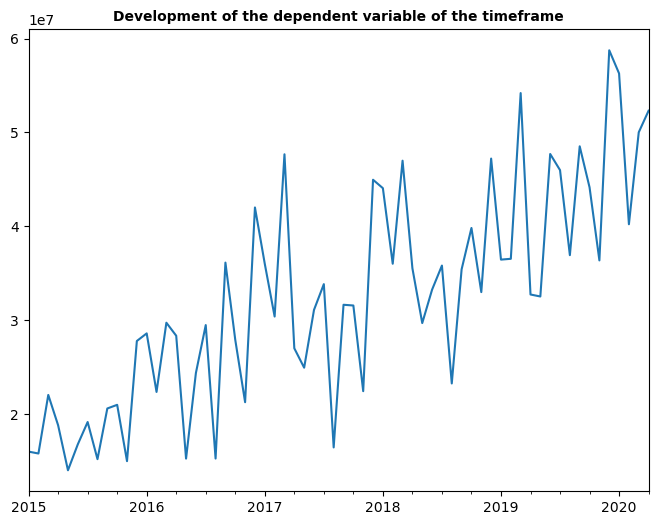

In [12]:
plt.figure(figsize=(8,6))
df['Revenue'].plot()
plt.title('Development of the dependent variable of the timeframe', size=10, fontweight='bold')

Here, we can see that our dependent variable, revenue, has a linear trend and seems not stationary. By looking at it, we can observe a seasonal trend. Later on, we will see if the data has a seasonal aspect.

Next, we display all features (dependent and independent variables) in one graph.

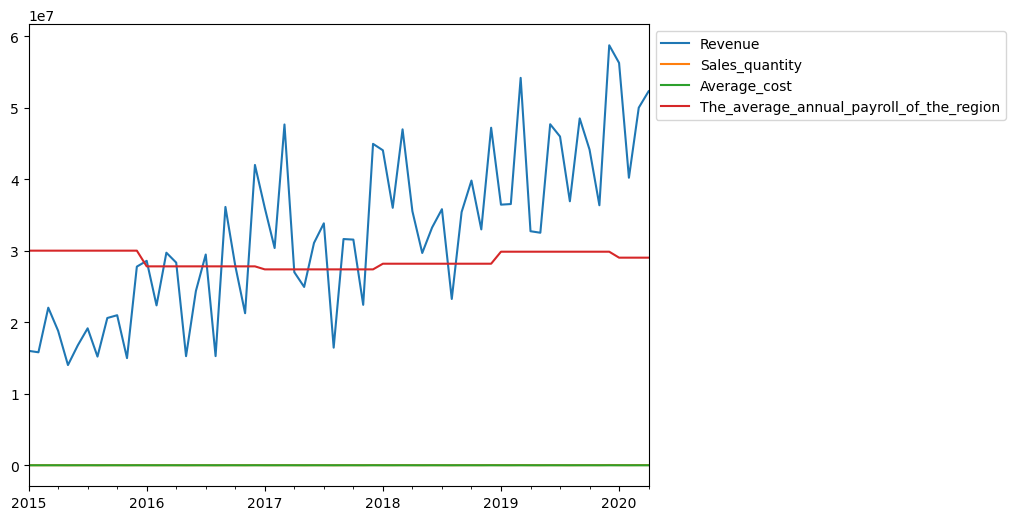

In [13]:
plt.figure(figsize=(8,6))
cols=df.columns.to_list()
for x in cols:
    df[x].plot(legend=True)
plt.legend(bbox_to_anchor=(1, 1))

Displaying all features at once does not help us. This is due to the significant variance in the value size. Therefore, I will display each feature separately. To do that, I will create a new data frame with additional columns to make the whole exploratory analysis easier/better understandable.

In [14]:
df_ea=df.copy()
df_ea=df_ea.reset_index()
#creating a a new column where we transform numerical values to string values
df_ea['Month']=df_ea['index'].dt.month.replace({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',
                                               10:'Oct',11:'Nov',12:'Dec'})
df_ea['Year']=df_ea['index'].dt.year
#creating a a new column where we transform numerical values to string values
df_ea['Weekday']=df_ea['index'].dt.weekday.replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',
                                                   6:'Sunday'})
df_ea.rename(columns={'index':'Period'},inplace=True)
df_ea.set_index('Period', inplace=True)

In [15]:
df_ea.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,Month,Year,Weekday
Period,,,,,,,
2015-01-01,16010072,12729,1258,30024676,Jan,2015,Thursday
2015-02-01,15807587,11636,1359,30024676,Feb,2015,Sunday
2015-03-01,22047146,15922,1385,30024676,Mar,2015,Sunday
2015-04-01,18814583,15227,1236,30024676,April,2015,Wednesday
2015-05-01,14021480,8620,1627,30024676,May,2015,Friday


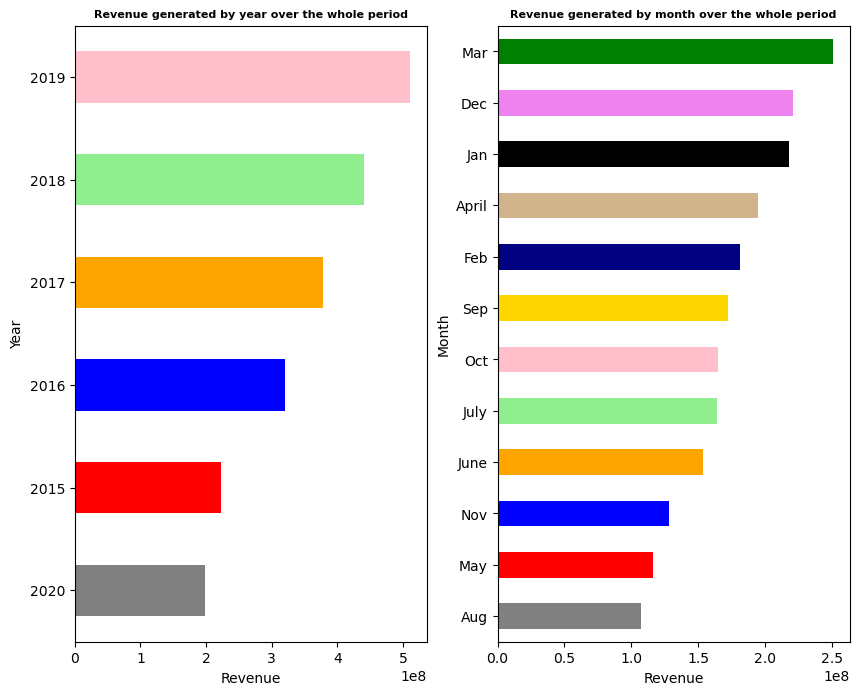

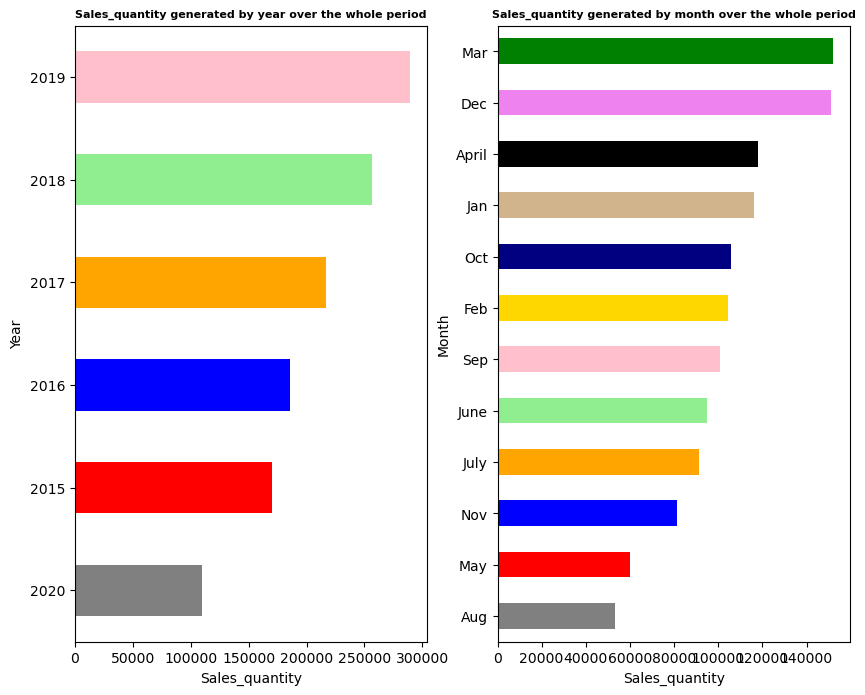

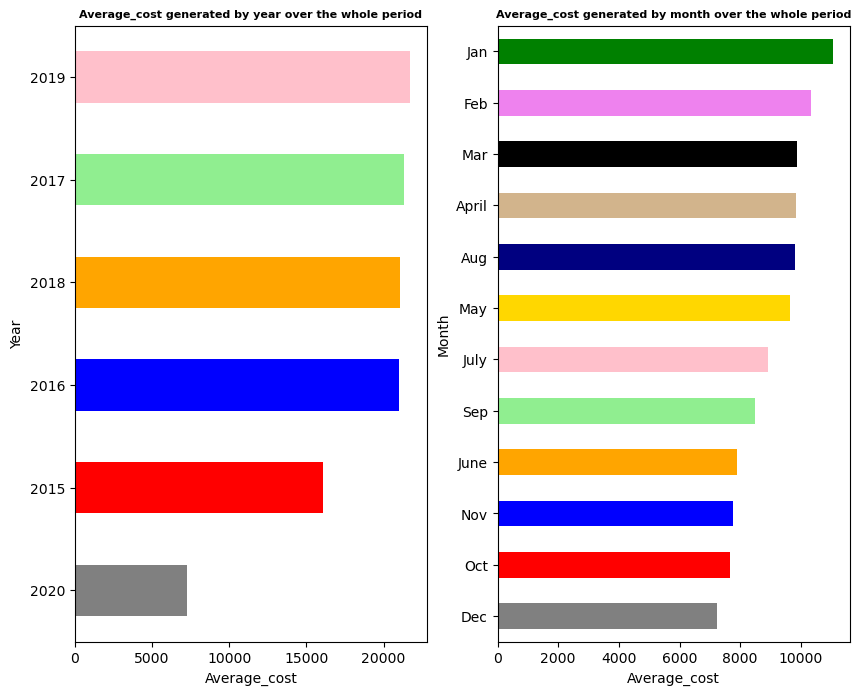

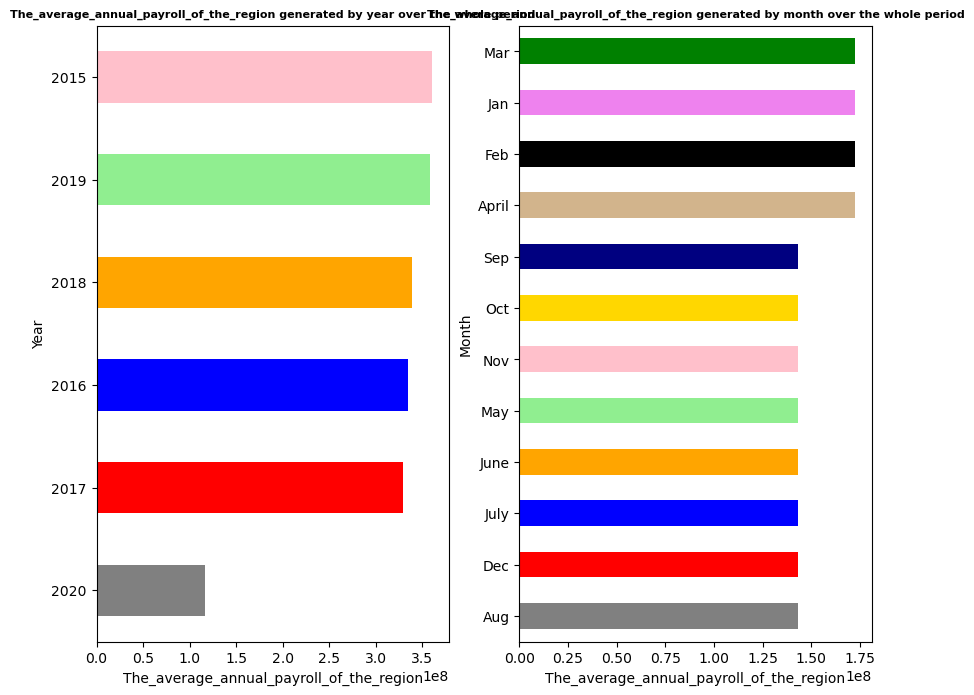

In [16]:
feat=df_ea.columns.to_list()[:4]

for x in feat:
    plt.subplot(1,2,1)
    df_ea.groupby(['Year'])[x].sum().sort_values().plot(kind='barh', color=['gray','red','blue','orange','lightgreen','pink',
                                                                    'gold','navy','tan','black','violet','green'],
                                         figsize=(10,8))
    plt.xlabel('{}'.format(x))
    plt.title('{} generated by year over the whole period'.format(x),size=8,fontweight='bold')
    print('\n')
    plt.subplot(1,2,2)
    df_ea.groupby(['Month'])[x].sum().sort_values().plot(kind='barh', color=['gray','red','blue','orange','lightgreen','pink',
                                                                    'gold','navy','tan','black','violet','green'],
                                          figsize=(10,8))
    plt.xlabel('{}'.format(x))
    plt.title('{} generated by month over the whole period'.format(x),size=8,fontweight='bold')
    plt.show() #when using matplotlib and a loop we use .show()

When we look at the graphs, we can see that 2019 was the strongest year regarding revenue and sold quantity. At the same time, the cost per sale was the most in 2019 due to the fact that they sold the most in 2019. The very interesting aspect is that 2019 did not have the biggest payroll, that was in 2015. I must point out that 2020 does not contain the full 12 months.

Another interesting aspect is that March and January are the most vital months in the whole period. March was the best month for revenue, units sold, and average payroll, but January was the strongest month regarding average costs generated.

In this for loop, I have performed aggregations; in the next for loop, I will analyse the statistical aspects of the data by using the boxplots.

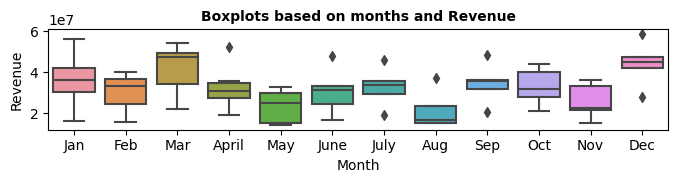

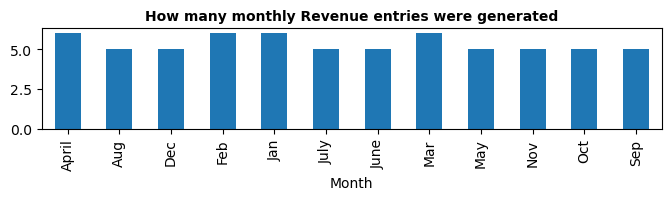

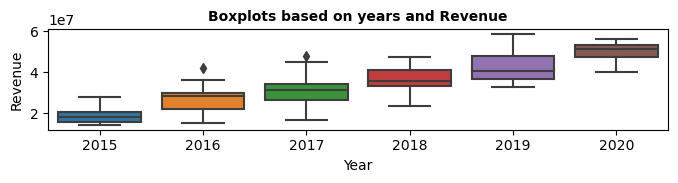

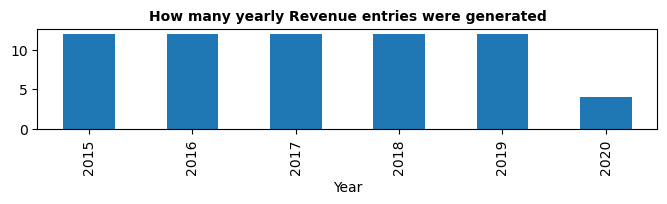

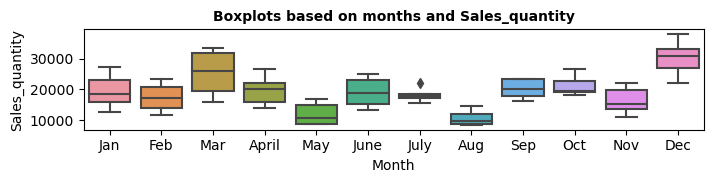

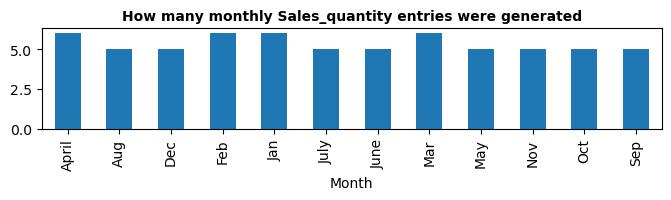

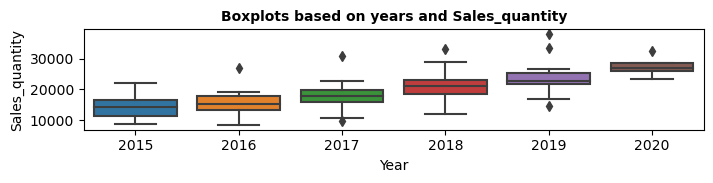

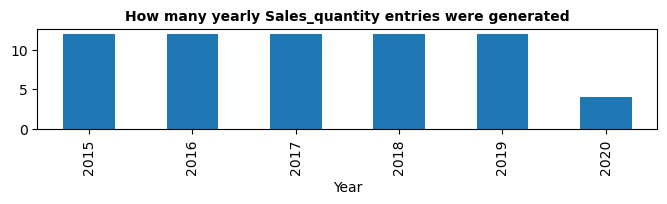

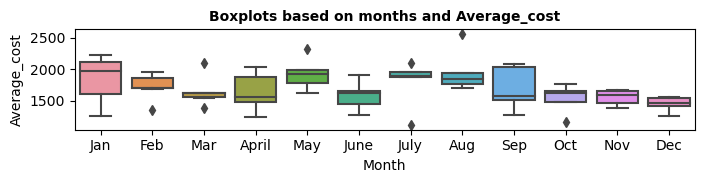

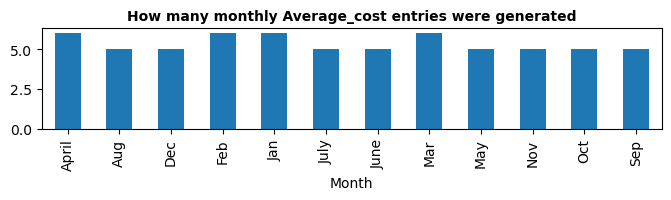

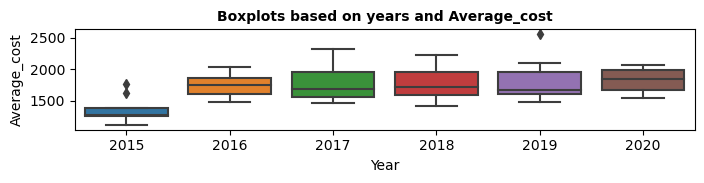

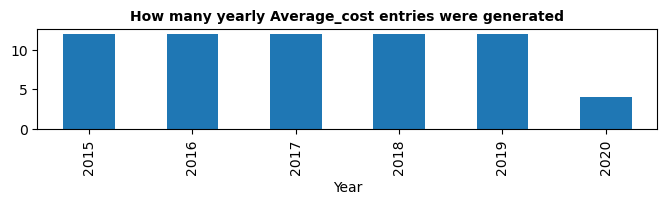

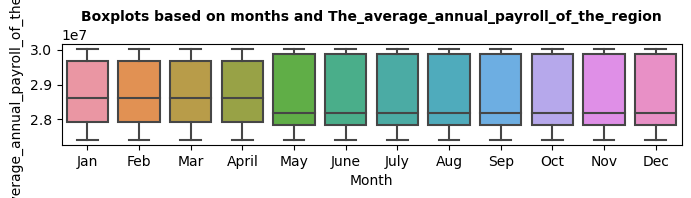

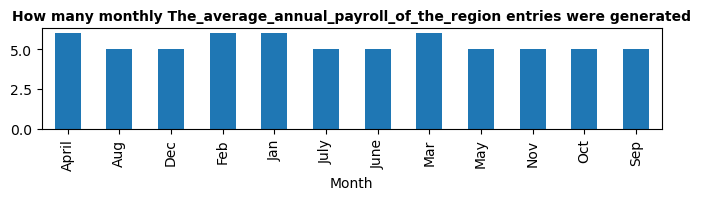

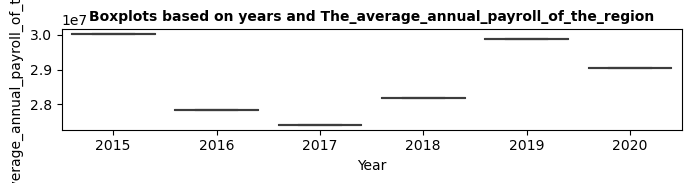

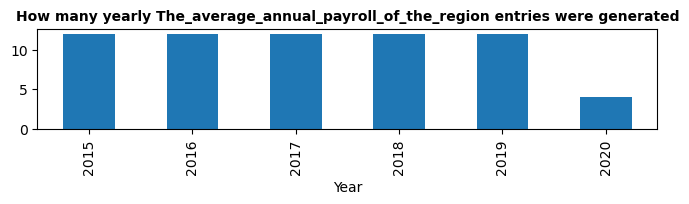

In [17]:
feat=df_ea.columns.to_list()[:4]
for x in feat:
    plt.figure(figsize=(8,6))
    plt.subplot(4,1,1)
    sns.boxplot(x='Month',y=x, data=df_ea)
    plt.title('Boxplots based on months and {}'.format(x), size=10, fontweight='bold')
    
    plt.figure(figsize=(8,6))
    plt.subplot(4,1,2)
    df_ea.groupby('Month')[x].count().plot(kind='bar')
    plt.title('How many monthly {} entries were generated'.format(x), size=10, fontweight='bold')
    
    plt.figure(figsize=(8,6))
    plt.subplot(4,1,3)
    sns.boxplot(x='Year',y=x, data=df_ea)
    plt.title('Boxplots based on years and {}'.format(x), size=10, fontweight='bold')
    
    plt.figure(figsize=(8,6))
    plt.subplot(4,1,4)
    df_ea.groupby('Year')[x].count().plot(kind='bar')
    plt.title('How many yearly {} entries were generated'.format(x), size=10, fontweight='bold')
    plt.show()

Looking at aggregated graphs, we see that 2019 was the best-performing year. I have used count- and boxplots at the second level of the analysis. Here, we can observe a different picture. The boxplots indicate that 2020 is the best-performing year, even though we only have the first four months of 2020.
This trend/fact is observable in the variables revenue and sales; there, we can see that they sell the most units and generate relatively considerable amounts/larger amounts of revenue within the first four months.

Earlier, I mentioned that we are not sure that we observe a seasonal trend, but when we look at the aggregation graphs and boxplots, we can see that March has one of the biggest value ranges but the highest top range. But when we look at December, we see a relatively small value range, which consists of high values. That aspect would support a seasonal trend that occurs every year around December.

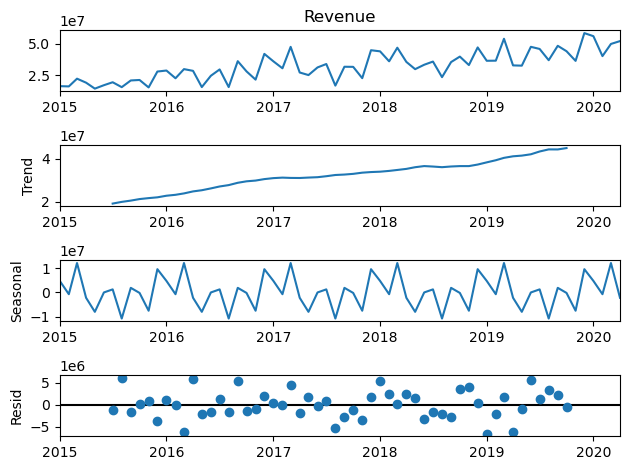

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

sea_trend=seasonal_decompose(df_ea['Revenue'])
sea_trend.plot();

This graph allows us to see the dependent variable's trend, seasonal effects and residuals. Here, we can observe a linear trend, but more importantly, we get proof of the seasonal effects/trend. Here, we can see that at the end of the year, we always get a peak, which indicates a seasonal trend/effect.

When we looked at the plot graph of our dependent variable, we could see that the data was not stationary, but I will perform the Ad Fuller test to determine if the data is stationary or not.

In [19]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df_ea['Revenue'],autolag='AIC')
print('p-value: {}'.format(result[1]))

p-value: 0.9297615379617785


As we can see, the p-value is bigger than 0.05; therefore, the data is not stationary.

## Creating the Models for Forecasting

In the following step of the project, I will try different models to find the best-fitting model for the data I use.
I will try the following models:

- AutoRegression

- Holt-Winters

    -- SimpleSmoothing
    
    -- ExponentialSmoothing

- TBATS

- SARIMA

Let's start with the AutoRegression model.

### AutoRegression

#### Creating the Train and Test Set

In [20]:
#we want to predict five months into the future
test_length=5
train=df.iloc[:-test_length,:]
test=df.iloc[-test_length:,:]

In [21]:
from statsmodels.tsa.ar_model import AutoReg, ARResults
from statsmodels.tsa.ar_model import ar_select_order

In [22]:
#number of recommended lags
best_lag=ar_select_order(df['Revenue'],maxlag=10, seasonal=True, trend='c',period=12)
best_lag.ar_lags[-1]

3

In [23]:
auto=AutoReg(train['Revenue'],lags=3).fit()

In [24]:
start=len(train)
end=len(train)+len(test)-1

pred_auto=auto.predict(start,end).rename('AutoReg')
pred_auto

2019-12-01   45657851
2020-01-01   43198238
2020-02-01   38212878
2020-03-01   43834521
2020-04-01   42452623
Freq: MS, Name: AutoReg, dtype: float64

<Axes: >

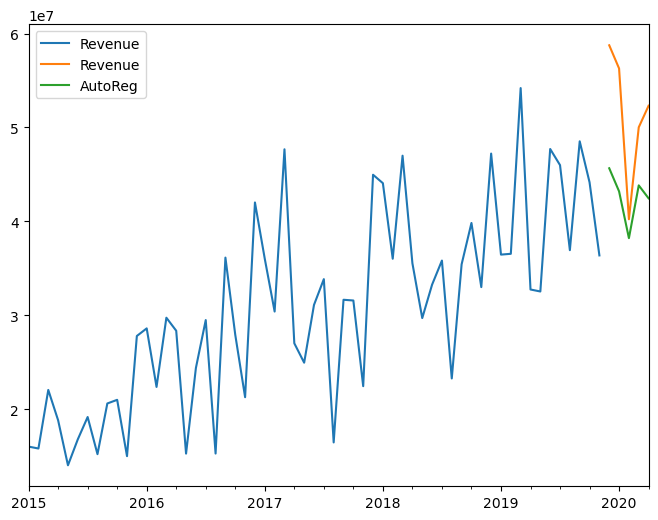

In [25]:
plt.figure(figsize=(8,6))
train['Revenue'].plot(legend=True)
test['Revenue'].plot(legend=True)
pred_auto.plot(legend=True)

In [26]:
from sklearn.metrics import mean_squared_error
rmse_auto=np.sqrt(mean_squared_error(test['Revenue'],pred_auto))
rmse_auto

9824856.189001685

### Holt-Winters

We need to be aware that we have different approaches to Holt-Winters. There is Simple and Exponential smoothing. In this project, I will use both models.

In [27]:
#SimpleSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span=5
alpha=2/(span+1)

holt_wint_sim=SimpleExpSmoothing(train['Revenue']).fit(smoothing_level=alpha)
pred_hw_sim=holt_wint_sim.forecast(steps=len(test)).rename('HW_Sim')
pred_hw_sim

2019-12-01   41167810
2020-01-01   41167810
2020-02-01   41167810
2020-03-01   41167810
2020-04-01   41167810
Freq: MS, Name: HW_Sim, dtype: float64

<Axes: >

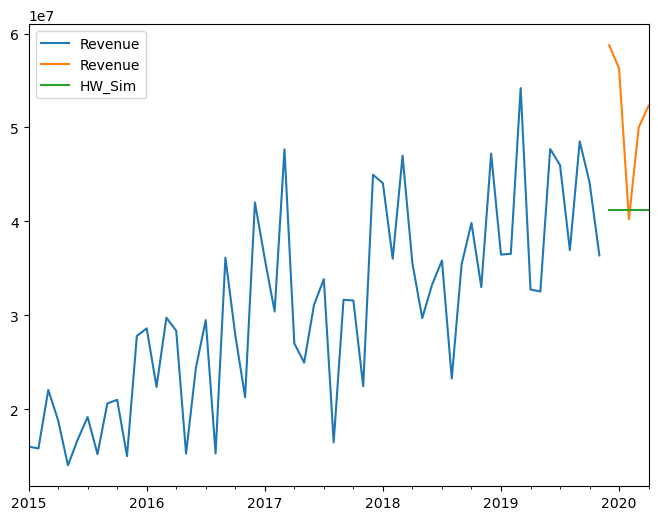

In [28]:
plt.figure(figsize=(8,6))
train['Revenue'].plot(legend=True)
test['Revenue'].plot(legend=True)
pred_hw_sim.plot(legend=True)

In [29]:
#model evaluation
rmse_hw_simp=np.sqrt(mean_squared_error(test['Revenue'],pred_hw_sim))
rmse_hw_simp

12179204.97992079

In [30]:
#ExponentialSmoothing
#152 are five weeks
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hol_wint_exp=ExponentialSmoothing(train['Revenue'],
                             trend='mul',
                             seasonal_periods=152).fit()

C:\Users\gandj\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [31]:
pred_hw_exp=hol_wint_exp.forecast(steps=len(test)).rename('HW_Exp')
pred_hw_exp

2019-12-01   47946445
2020-01-01   48800149
2020-02-01   49669054
2020-03-01   50553430
2020-04-01   51453553
Freq: MS, Name: HW_Exp, dtype: float64

<Axes: >

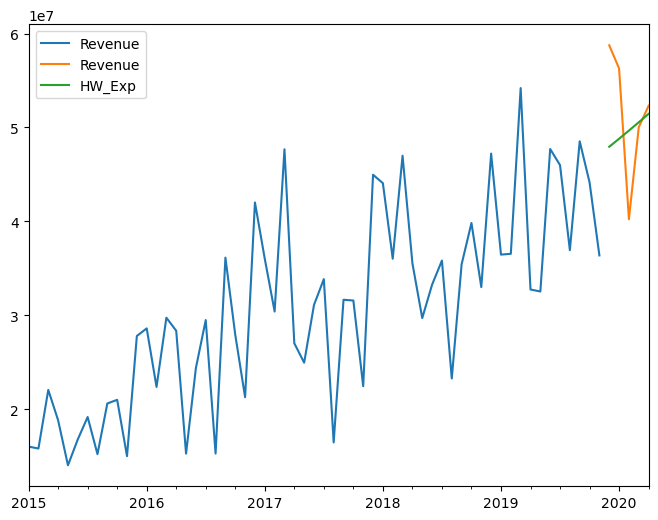

In [32]:
plt.figure(figsize=(8,6))
train['Revenue'].plot(legend=True)
test['Revenue'].plot(legend=True)
pred_hw_exp.plot(legend=True)

In [33]:
#model evaluation
from sklearn.metrics import mean_squared_error
rmse_hw_exp=np.sqrt(mean_squared_error(test['Revenue'],pred_hw_exp))
rmse_hw_exp

7254638.259633856

### TBATS

In [34]:
from tbats import TBATS
tbats=TBATS(use_box_cox=True,
           use_trend=True,
           seasonal_periods=[12],
           use_arma_errors=True).fit(train['Revenue'])

In [35]:
pred_tbats=pd.Series(tbats.forecast(len(test))).rename('TBATS')
pred_tbats.index=test.index
pred_tbats

2019-12-01   55339968
2020-01-01   48688498
2020-02-01   45353156
2020-03-01   56765390
2020-04-01   45236776
Freq: MS, Name: TBATS, dtype: float64

<Axes: >

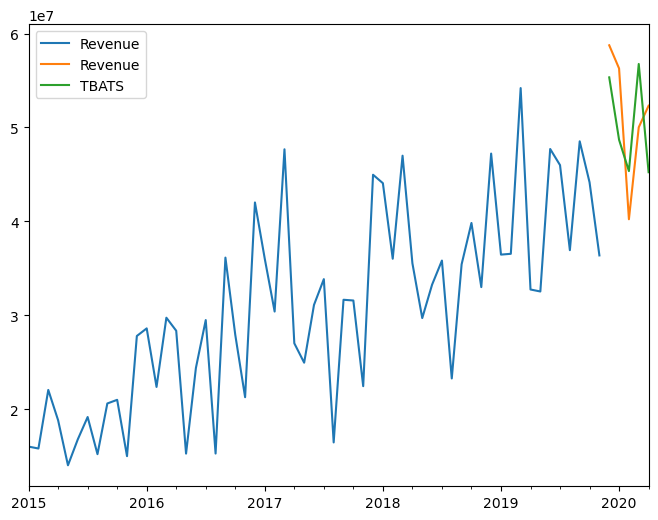

In [36]:
plt.figure(figsize=(8,6))
train['Revenue'].plot(legend=True)
test['Revenue'].plot(legend=True)
pred_tbats.plot(legend=True)

In [37]:
rmse_tbats=np.sqrt(mean_squared_error(test['Revenue'],pred_tbats))
rmse_tbats

6186727.166361232

### SARIMA

In [38]:
#to find the best hyperparameter for the model, we will perform auto_arima
##auto_arima will allow us to pass several different values for the hyperparameters, and the model will find the best
###suiting values for the hyperparameters

from pmdarima import auto_arima
hayper_sar=auto_arima(train['Revenue'], seasonal=True, m=12, trace=True).summary()
hayper_sar

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1593.244, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1595.424, Time=0.05 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1595.563, Time=0.05 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1630.176, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1595.141, Time=0.02 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1594.960, Time=0.02 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1596.838, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1593.431, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1593.579, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1594.940, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 0.659 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   59
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -794.622
Date:                  Sat, 23 Dec 2023   AIC                           1593.244
Time:                          10:41:55   BIC                           1596.945
Sample:                      01-01-2015   HQIC                          1594.637
                           - 11-01-2019                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.897e+06   7.77e+05      7.586      0.000    4.37e+06    7.42e+06
sigma2      2.836e+13   6.01e+12      4.715      0.000    1.66e+13    4.01e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.40   Prob(JB):                         0.98
Heteroskedasticity (H):               1.10   Skew:                            -0.06
Prob(H) (two-sided):                  0.86   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sar=SARIMAX(train['Revenue'],order=(0,0,0),seasonal_order=(0,1,0,12),enforce_invertibility=False)
sar_model=sar.fit()
sar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                  Revenue   No. Observations:                   59
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -814.088
Date:                  Sat, 23 Dec 2023   AIC                           1630.176
Time:                          10:41:55   BIC                           1632.026
Sample:                      01-01-2015   HQIC                          1630.873
                           - 11-01-2019                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.029e+13      1e+13      5.023      0.000    3.07e+13    6.99e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.40   Prob(JB):                         0.98
Heteroskedasticity (H):               0.72   Skew:                            -0.06
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
#making predictions with the model
start=len(train)
end=len(train)+len(test)-1
pred_sar=sar_model.predict(start,end,dynamic=False).rename('sar_model')

<Axes: >

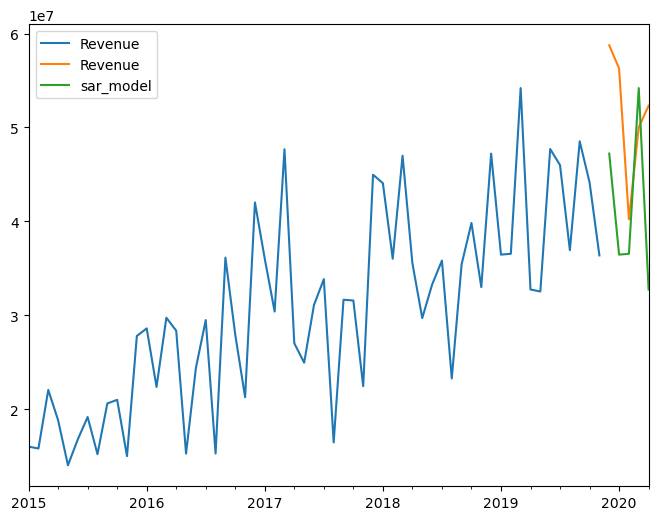

In [41]:
plt.figure(figsize=(8,6))
train['Revenue'].plot(legend=True)
test['Revenue'].plot(legend=True)
pred_sar.plot(legend=True)

In [42]:
#evaluating the model
rmse_sar=np.sqrt(mean_squared_error(test['Revenue'],pred_sar))
rmse_sar

13714482.258395547

### Prophet

Note that the FaceBook Prophet model does not need/operate on data with frequency. Therefore, I will reload the data dataset.

In [43]:
df_p=pd.read_csv(r"C:\Users\gandj\OneDrive\Desktop\Case Study\TimeSeries\Revenue\Month_Value_1.csv")
df_p=df_p.rename(columns={'Period':'ds', 'Revenue':'y'})
df_p['ds']=pd.to_datetime(df_p['ds'])
df_p=df_p.dropna()
df_p.head()

,ds,y,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,16010072,12729,1258,30024676
1,2015-01-02,15807587,11636,1359,30024676
2,2015-01-03,22047146,15922,1385,30024676
3,2015-01-04,18814583,15227,1236,30024676
4,2015-01-05,14021480,8620,1627,30024676


In [44]:
test_length=5
train_pro=df_p.iloc[:-test_length,:]
test_pro=df_p.iloc[-test_length:,:]

In [45]:
train.tail()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
2019-07-01,45992142,21917,2098,29878525
2019-08-01,36933665,14431,2559,29878525
2019-09-01,48526260,23253,2087,29878525
2019-10-01,44160416,26603,1660,29878525
2019-11-01,36374956,21987,1654,29878525


In [46]:
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
from prophet.diagnostics import cross_validation

param_grid={'changepoint_prior_scale':np.linspace(0.001,0.5,5).tolist(),
           'seasonality_prior_scale':np.linspace(0.01,10,5).tolist(),
           'seasonality_mode':['additive','multiplicative']}
grid=ParameterGrid(param_grid)

rmse=[]
for x in grid:
    m=Prophet(growth='linear',
              yearly_seasonality=True,
              weekly_seasonality=False,
              daily_seasonality=False,
              seasonality_mode=x['seasonality_mode'],
             seasonality_prior_scale=x['seasonality_prior_scale'],
             changepoint_prior_scale=x['changepoint_prior_scale'])
    m.add_regressor('Sales_quantity')
    m.add_regressor('Average_cost')
    m.add_regressor('The_average_annual_payroll_of_the_region')
    m.fit(train_pro)
    
    df_cv=cross_validation(m,
                          horizon='152 days',
                          initial='365.25 days',
                          period='30 days')
    error=np.sqrt(mean_squared_error(df_cv.yhat, df_cv.y))
    rmse.append(error)

10:41:56 - cmdstanpy - INFO - Chain [1] start processing
10:41:57 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:41:57 - cmdstanpy - INFO - Chain [1] start processing
10:41:57 - cmdstanpy - INFO - Chain [1] done processing
10:41:57 - cmdstanpy - INFO - Chain [1] start processing
10:41:57 - cmdstanpy - INFO - Chain [1] done processing
10:41:58 - cmdstanpy - INFO - Chain [1] start processing
10:41:58 - cmdstanpy - INFO - Chain [1] done processing
10:41:58 - cmdstanpy - INFO - Chain [1] start processing
10:41:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:41:58 - cmdstanpy - INFO - Chain [1] start processing
10:41:58 - cmdstanpy - INFO - Chain [1] done processing
10:41:58 - cmdstanpy - INFO - Chain [1] start processing
10:41:59 - cmdstanpy - INFO - Chain [1] done processing
10:41:59 - cmdstanpy - INFO - Chain [1] start processing
10:41:59 - cmdstanpy - INFO - Chain [1] done processing
10:41:59 - cmdstanpy - INFO - Chain [1] start processing
10:41:59 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:41:59 - cmdstanpy - INFO - Chain [1] start processing
10:42:00 - cmdstanpy - INFO - Chain [1] done processing
10:42:00 - cmdstanpy - INFO - Chain [1] start processing
10:42:01 - cmdstanpy - INFO - Chain [1] done processing
10:42:01 - cmdstanpy - INFO - Chain [1] start processing
10:42:02 - cmdstanpy - INFO - Chain [1] done processing
10:42:02 - cmdstanpy - INFO - Chain [1] start processing
10:42:03 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:03 - cmdstanpy - INFO - Chain [1] start processing
10:42:03 - cmdstanpy - INFO - Chain [1] done processing
10:42:03 - cmdstanpy - INFO - Chain [1] start processing
10:42:04 - cmdstanpy - INFO - Chain [1] done processing
10:42:04 - cmdstanpy - INFO - Chain [1] start processing
10:42:04 - cmdstanpy - INFO - Chain [1] done processing
10:42:05 - cmdstanpy - INFO - Chain [1] start processing
10:42:05 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:05 - cmdstanpy - INFO - Chain [1] start processing
10:42:05 - cmdstanpy - INFO - Chain [1] done processing
10:42:05 - cmdstanpy - INFO - Chain [1] start processing
10:42:05 - cmdstanpy - INFO - Chain [1] done processing
10:42:05 - cmdstanpy - INFO - Chain [1] start processing
10:42:05 - cmdstanpy - INFO - Chain [1] done processing
10:42:05 - cmdstanpy - INFO - Chain [1] start processing
10:42:05 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:06 - cmdstanpy - INFO - Chain [1] start processing
10:42:06 - cmdstanpy - INFO - Chain [1] done processing
10:42:06 - cmdstanpy - INFO - Chain [1] start processing
10:42:06 - cmdstanpy - INFO - Chain [1] done processing
10:42:06 - cmdstanpy - INFO - Chain [1] start processing
10:42:06 - cmdstanpy - INFO - Chain [1] done processing
10:42:06 - cmdstanpy - INFO - Chain [1] start processing
10:42:06 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:07 - cmdstanpy - INFO - Chain [1] start processing
10:42:07 - cmdstanpy - INFO - Chain [1] done processing
10:42:07 - cmdstanpy - INFO - Chain [1] start processing
10:42:07 - cmdstanpy - INFO - Chain [1] done processing
10:42:07 - cmdstanpy - INFO - Chain [1] start processing
10:42:08 - cmdstanpy - INFO - Chain [1] done processing
10:42:08 - cmdstanpy - INFO - Chain [1] start processing
10:42:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:08 - cmdstanpy - INFO - Chain [1] start processing
10:42:08 - cmdstanpy - INFO - Chain [1] done processing
10:42:09 - cmdstanpy - INFO - Chain [1] start processing
10:42:09 - cmdstanpy - INFO - Chain [1] done processing
10:42:09 - cmdstanpy - INFO - Chain [1] start processing
10:42:09 - cmdstanpy - INFO - Chain [1] done processing
10:42:09 - cmdstanpy - INFO - Chain [1] start processing
10:42:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:09 - cmdstanpy - INFO - Chain [1] start processing
10:42:11 - cmdstanpy - INFO - Chain [1] done processing
10:42:11 - cmdstanpy - INFO - Chain [1] start processing
10:42:11 - cmdstanpy - INFO - Chain [1] done processing
10:42:11 - cmdstanpy - INFO - Chain [1] start processing
10:42:11 - cmdstanpy - INFO - Chain [1] done processing
10:42:11 - cmdstanpy - INFO - Chain [1] start processing
10:42:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:12 - cmdstanpy - INFO - Chain [1] start processing
10:42:13 - cmdstanpy - INFO - Chain [1] done processing
10:42:13 - cmdstanpy - INFO - Chain [1] start processing
10:42:14 - cmdstanpy - INFO - Chain [1] done processing
10:42:14 - cmdstanpy - INFO - Chain [1] start processing
10:42:14 - cmdstanpy - INFO - Chain [1] done processing
10:42:14 - cmdstanpy - INFO - Chain [1] start processing
10:42:14 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:15 - cmdstanpy - INFO - Chain [1] start processing
10:42:15 - cmdstanpy - INFO - Chain [1] done processing
10:42:15 - cmdstanpy - INFO - Chain [1] start processing
10:42:15 - cmdstanpy - INFO - Chain [1] done processing
10:42:15 - cmdstanpy - INFO - Chain [1] start processing
10:42:16 - cmdstanpy - INFO - Chain [1] done processing
10:42:16 - cmdstanpy - INFO - Chain [1] start processing
10:42:16 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:16 - cmdstanpy - INFO - Chain [1] start processing
10:42:16 - cmdstanpy - INFO - Chain [1] done processing
10:42:16 - cmdstanpy - INFO - Chain [1] start processing
10:42:16 - cmdstanpy - INFO - Chain [1] done processing
10:42:17 - cmdstanpy - INFO - Chain [1] start processing
10:42:17 - cmdstanpy - INFO - Chain [1] done processing
10:42:17 - cmdstanpy - INFO - Chain [1] start processing
10:42:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:18 - cmdstanpy - INFO - Chain [1] start processing
10:42:18 - cmdstanpy - INFO - Chain [1] done processing
10:42:18 - cmdstanpy - INFO - Chain [1] start processing
10:42:18 - cmdstanpy - INFO - Chain [1] done processing
10:42:18 - cmdstanpy - INFO - Chain [1] start processing
10:42:19 - cmdstanpy - INFO - Chain [1] done processing
10:42:19 - cmdstanpy - INFO - Chain [1] start processing
10:42:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:19 - cmdstanpy - INFO - Chain [1] start processing
10:42:19 - cmdstanpy - INFO - Chain [1] done processing
10:42:19 - cmdstanpy - INFO - Chain [1] start processing
10:42:20 - cmdstanpy - INFO - Chain [1] done processing
10:42:20 - cmdstanpy - INFO - Chain [1] start processing
10:42:20 - cmdstanpy - INFO - Chain [1] done processing
10:42:20 - cmdstanpy - INFO - Chain [1] start processing
10:42:21 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:21 - cmdstanpy - INFO - Chain [1] start processing
10:42:21 - cmdstanpy - INFO - Chain [1] done processing
10:42:21 - cmdstanpy - INFO - Chain [1] start processing
10:42:21 - cmdstanpy - INFO - Chain [1] done processing
10:42:21 - cmdstanpy - INFO - Chain [1] start processing
10:42:22 - cmdstanpy - INFO - Chain [1] done processing
10:42:22 - cmdstanpy - INFO - Chain [1] start processing
10:42:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:22 - cmdstanpy - INFO - Chain [1] start processing
10:42:22 - cmdstanpy - INFO - Chain [1] done processing
10:42:22 - cmdstanpy - INFO - Chain [1] start processing
10:42:23 - cmdstanpy - INFO - Chain [1] done processing
10:42:23 - cmdstanpy - INFO - Chain [1] start processing
10:42:23 - cmdstanpy - INFO - Chain [1] done processing
10:42:23 - cmdstanpy - INFO - Chain [1] start processing
10:42:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:24 - cmdstanpy - INFO - Chain [1] start processing
10:42:24 - cmdstanpy - INFO - Chain [1] done processing
10:42:24 - cmdstanpy - INFO - Chain [1] start processing
10:42:25 - cmdstanpy - INFO - Chain [1] done processing
10:42:25 - cmdstanpy - INFO - Chain [1] start processing
10:42:26 - cmdstanpy - INFO - Chain [1] done processing
10:42:26 - cmdstanpy - INFO - Chain [1] start processing
10:42:27 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:27 - cmdstanpy - INFO - Chain [1] start processing
10:42:29 - cmdstanpy - INFO - Chain [1] done processing
10:42:29 - cmdstanpy - INFO - Chain [1] start processing
10:42:30 - cmdstanpy - INFO - Chain [1] done processing
10:42:30 - cmdstanpy - INFO - Chain [1] start processing
10:42:30 - cmdstanpy - INFO - Chain [1] done processing
10:42:30 - cmdstanpy - INFO - Chain [1] start processing
10:42:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:31 - cmdstanpy - INFO - Chain [1] start processing
10:42:31 - cmdstanpy - INFO - Chain [1] done processing
10:42:31 - cmdstanpy - INFO - Chain [1] start processing
10:42:32 - cmdstanpy - INFO - Chain [1] done processing
10:42:32 - cmdstanpy - INFO - Chain [1] start processing
10:42:32 - cmdstanpy - INFO - Chain [1] done processing
10:42:32 - cmdstanpy - INFO - Chain [1] start processing
10:42:33 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:33 - cmdstanpy - INFO - Chain [1] start processing
10:42:33 - cmdstanpy - INFO - Chain [1] done processing
10:42:33 - cmdstanpy - INFO - Chain [1] start processing
10:42:33 - cmdstanpy - INFO - Chain [1] done processing
10:42:34 - cmdstanpy - INFO - Chain [1] start processing
10:42:34 - cmdstanpy - INFO - Chain [1] done processing
10:42:34 - cmdstanpy - INFO - Chain [1] start processing
10:42:35 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:35 - cmdstanpy - INFO - Chain [1] start processing
10:42:35 - cmdstanpy - INFO - Chain [1] done processing
10:42:35 - cmdstanpy - INFO - Chain [1] start processing
10:42:35 - cmdstanpy - INFO - Chain [1] done processing
10:42:36 - cmdstanpy - INFO - Chain [1] start processing
10:42:36 - cmdstanpy - INFO - Chain [1] done processing
10:42:36 - cmdstanpy - INFO - Chain [1] start processing
10:42:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:37 - cmdstanpy - INFO - Chain [1] start processing
10:42:37 - cmdstanpy - INFO - Chain [1] done processing
10:42:37 - cmdstanpy - INFO - Chain [1] start processing
10:42:37 - cmdstanpy - INFO - Chain [1] done processing
10:42:37 - cmdstanpy - INFO - Chain [1] start processing
10:42:38 - cmdstanpy - INFO - Chain [1] done processing
10:42:38 - cmdstanpy - INFO - Chain [1] start processing
10:42:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:38 - cmdstanpy - INFO - Chain [1] start processing
10:42:39 - cmdstanpy - INFO - Chain [1] done processing
10:42:39 - cmdstanpy - INFO - Chain [1] start processing
10:42:39 - cmdstanpy - INFO - Chain [1] done processing
10:42:39 - cmdstanpy - INFO - Chain [1] start processing
10:42:40 - cmdstanpy - INFO - Chain [1] done processing
10:42:40 - cmdstanpy - INFO - Chain [1] start processing
10:42:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:40 - cmdstanpy - INFO - Chain [1] start processing
10:42:41 - cmdstanpy - INFO - Chain [1] done processing
10:42:41 - cmdstanpy - INFO - Chain [1] start processing
10:42:41 - cmdstanpy - INFO - Chain [1] done processing
10:42:41 - cmdstanpy - INFO - Chain [1] start processing
10:42:42 - cmdstanpy - INFO - Chain [1] done processing
10:42:42 - cmdstanpy - INFO - Chain [1] start processing
10:42:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:42 - cmdstanpy - INFO - Chain [1] start processing
10:42:42 - cmdstanpy - INFO - Chain [1] done processing
10:42:43 - cmdstanpy - INFO - Chain [1] start processing
10:42:44 - cmdstanpy - INFO - Chain [1] done processing
10:42:44 - cmdstanpy - INFO - Chain [1] start processing
10:42:45 - cmdstanpy - INFO - Chain [1] done processing
10:42:45 - cmdstanpy - INFO - Chain [1] start processing
10:42:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:45 - cmdstanpy - INFO - Chain [1] start processing
10:42:45 - cmdstanpy - INFO - Chain [1] done processing
10:42:45 - cmdstanpy - INFO - Chain [1] start processing
10:42:46 - cmdstanpy - INFO - Chain [1] done processing
10:42:46 - cmdstanpy - INFO - Chain [1] start processing
10:42:46 - cmdstanpy - INFO - Chain [1] done processing
10:42:47 - cmdstanpy - INFO - Chain [1] start processing
10:42:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:48 - cmdstanpy - INFO - Chain [1] start processing
10:42:52 - cmdstanpy - INFO - Chain [1] done processing
10:42:52 - cmdstanpy - INFO - Chain [1] start processing
10:42:52 - cmdstanpy - INFO - Chain [1] done processing
10:42:52 - cmdstanpy - INFO - Chain [1] start processing
10:42:53 - cmdstanpy - INFO - Chain [1] done processing
10:42:53 - cmdstanpy - INFO - Chain [1] start processing
10:42:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:54 - cmdstanpy - INFO - Chain [1] start processing
10:42:55 - cmdstanpy - INFO - Chain [1] done processing
10:42:55 - cmdstanpy - INFO - Chain [1] start processing
10:42:56 - cmdstanpy - INFO - Chain [1] done processing
10:42:56 - cmdstanpy - INFO - Chain [1] start processing
10:42:57 - cmdstanpy - INFO - Chain [1] done processing
10:42:57 - cmdstanpy - INFO - Chain [1] start processing
10:42:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:42:58 - cmdstanpy - INFO - Chain [1] start processing
10:42:59 - cmdstanpy - INFO - Chain [1] done processing
10:42:59 - cmdstanpy - INFO - Chain [1] start processing
10:42:59 - cmdstanpy - INFO - Chain [1] done processing
10:42:59 - cmdstanpy - INFO - Chain [1] start processing
10:43:00 - cmdstanpy - INFO - Chain [1] done processing
10:43:00 - cmdstanpy - INFO - Chain [1] start processing
10:43:00 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:00 - cmdstanpy - INFO - Chain [1] start processing
10:43:01 - cmdstanpy - INFO - Chain [1] done processing
10:43:01 - cmdstanpy - INFO - Chain [1] start processing
10:43:01 - cmdstanpy - INFO - Chain [1] done processing
10:43:01 - cmdstanpy - INFO - Chain [1] start processing
10:43:01 - cmdstanpy - INFO - Chain [1] done processing
10:43:01 - cmdstanpy - INFO - Chain [1] start processing
10:43:02 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:02 - cmdstanpy - INFO - Chain [1] start processing
10:43:02 - cmdstanpy - INFO - Chain [1] done processing
10:43:03 - cmdstanpy - INFO - Chain [1] start processing
10:43:03 - cmdstanpy - INFO - Chain [1] done processing
10:43:03 - cmdstanpy - INFO - Chain [1] start processing
10:43:04 - cmdstanpy - INFO - Chain [1] done processing
10:43:04 - cmdstanpy - INFO - Chain [1] start processing
10:43:05 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:05 - cmdstanpy - INFO - Chain [1] start processing
10:43:05 - cmdstanpy - INFO - Chain [1] done processing
10:43:05 - cmdstanpy - INFO - Chain [1] start processing
10:43:05 - cmdstanpy - INFO - Chain [1] done processing
10:43:05 - cmdstanpy - INFO - Chain [1] start processing
10:43:06 - cmdstanpy - INFO - Chain [1] done processing
10:43:06 - cmdstanpy - INFO - Chain [1] start processing
10:43:07 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:07 - cmdstanpy - INFO - Chain [1] start processing
10:43:07 - cmdstanpy - INFO - Chain [1] done processing
10:43:07 - cmdstanpy - INFO - Chain [1] start processing
10:43:07 - cmdstanpy - INFO - Chain [1] done processing
10:43:07 - cmdstanpy - INFO - Chain [1] start processing
10:43:08 - cmdstanpy - INFO - Chain [1] done processing
10:43:08 - cmdstanpy - INFO - Chain [1] start processing
10:43:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:09 - cmdstanpy - INFO - Chain [1] start processing
10:43:09 - cmdstanpy - INFO - Chain [1] done processing
10:43:09 - cmdstanpy - INFO - Chain [1] start processing
10:43:10 - cmdstanpy - INFO - Chain [1] done processing
10:43:10 - cmdstanpy - INFO - Chain [1] start processing
10:43:11 - cmdstanpy - INFO - Chain [1] done processing
10:43:11 - cmdstanpy - INFO - Chain [1] start processing
10:43:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:11 - cmdstanpy - INFO - Chain [1] start processing
10:43:11 - cmdstanpy - INFO - Chain [1] done processing
10:43:12 - cmdstanpy - INFO - Chain [1] start processing
10:43:12 - cmdstanpy - INFO - Chain [1] done processing
10:43:12 - cmdstanpy - INFO - Chain [1] start processing
10:43:13 - cmdstanpy - INFO - Chain [1] done processing
10:43:13 - cmdstanpy - INFO - Chain [1] start processing
10:43:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:13 - cmdstanpy - INFO - Chain [1] start processing
10:43:13 - cmdstanpy - INFO - Chain [1] done processing
10:43:13 - cmdstanpy - INFO - Chain [1] start processing
10:43:14 - cmdstanpy - INFO - Chain [1] done processing
10:43:14 - cmdstanpy - INFO - Chain [1] start processing
10:43:14 - cmdstanpy - INFO - Chain [1] done processing
10:43:14 - cmdstanpy - INFO - Chain [1] start processing
10:43:16 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:16 - cmdstanpy - INFO - Chain [1] start processing
10:43:17 - cmdstanpy - INFO - Chain [1] done processing
10:43:17 - cmdstanpy - INFO - Chain [1] start processing
10:43:17 - cmdstanpy - INFO - Chain [1] done processing
10:43:17 - cmdstanpy - INFO - Chain [1] start processing
10:43:18 - cmdstanpy - INFO - Chain [1] done processing
10:43:18 - cmdstanpy - INFO - Chain [1] start processing
10:43:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:19 - cmdstanpy - INFO - Chain [1] start processing
10:43:21 - cmdstanpy - INFO - Chain [1] done processing
10:43:21 - cmdstanpy - INFO - Chain [1] start processing
10:43:22 - cmdstanpy - INFO - Chain [1] done processing
10:43:22 - cmdstanpy - INFO - Chain [1] start processing
10:43:22 - cmdstanpy - INFO - Chain [1] done processing
10:43:23 - cmdstanpy - INFO - Chain [1] start processing
10:43:23 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:23 - cmdstanpy - INFO - Chain [1] start processing
10:43:24 - cmdstanpy - INFO - Chain [1] done processing
10:43:24 - cmdstanpy - INFO - Chain [1] start processing
10:43:24 - cmdstanpy - INFO - Chain [1] done processing
10:43:24 - cmdstanpy - INFO - Chain [1] start processing
10:43:25 - cmdstanpy - INFO - Chain [1] done processing
10:43:25 - cmdstanpy - INFO - Chain [1] start processing
10:43:25 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:26 - cmdstanpy - INFO - Chain [1] start processing
10:43:27 - cmdstanpy - INFO - Chain [1] done processing
10:43:27 - cmdstanpy - INFO - Chain [1] start processing
10:43:27 - cmdstanpy - INFO - Chain [1] done processing
10:43:27 - cmdstanpy - INFO - Chain [1] start processing
10:43:27 - cmdstanpy - INFO - Chain [1] done processing
10:43:28 - cmdstanpy - INFO - Chain [1] start processing
10:43:28 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:28 - cmdstanpy - INFO - Chain [1] start processing
10:43:28 - cmdstanpy - INFO - Chain [1] done processing
10:43:28 - cmdstanpy - INFO - Chain [1] start processing
10:43:29 - cmdstanpy - INFO - Chain [1] done processing
10:43:29 - cmdstanpy - INFO - Chain [1] start processing
10:43:30 - cmdstanpy - INFO - Chain [1] done processing
10:43:30 - cmdstanpy - INFO - Chain [1] start processing
10:43:30 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:30 - cmdstanpy - INFO - Chain [1] start processing
10:43:31 - cmdstanpy - INFO - Chain [1] done processing
10:43:31 - cmdstanpy - INFO - Chain [1] start processing
10:43:31 - cmdstanpy - INFO - Chain [1] done processing
10:43:31 - cmdstanpy - INFO - Chain [1] start processing
10:43:32 - cmdstanpy - INFO - Chain [1] done processing
10:43:32 - cmdstanpy - INFO - Chain [1] start processing
10:43:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:33 - cmdstanpy - INFO - Chain [1] start processing
10:43:33 - cmdstanpy - INFO - Chain [1] done processing
10:43:33 - cmdstanpy - INFO - Chain [1] start processing
10:43:33 - cmdstanpy - INFO - Chain [1] done processing
10:43:33 - cmdstanpy - INFO - Chain [1] start processing
10:43:34 - cmdstanpy - INFO - Chain [1] done processing
10:43:34 - cmdstanpy - INFO - Chain [1] start processing
10:43:35 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:35 - cmdstanpy - INFO - Chain [1] start processing
10:43:35 - cmdstanpy - INFO - Chain [1] done processing
10:43:35 - cmdstanpy - INFO - Chain [1] start processing
10:43:35 - cmdstanpy - INFO - Chain [1] done processing
10:43:36 - cmdstanpy - INFO - Chain [1] start processing
10:43:36 - cmdstanpy - INFO - Chain [1] done processing
10:43:36 - cmdstanpy - INFO - Chain [1] start processing
10:43:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:37 - cmdstanpy - INFO - Chain [1] start processing
10:43:37 - cmdstanpy - INFO - Chain [1] done processing
10:43:37 - cmdstanpy - INFO - Chain [1] start processing
10:43:37 - cmdstanpy - INFO - Chain [1] done processing
10:43:38 - cmdstanpy - INFO - Chain [1] start processing
10:43:38 - cmdstanpy - INFO - Chain [1] done processing
10:43:38 - cmdstanpy - INFO - Chain [1] start processing
10:43:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:39 - cmdstanpy - INFO - Chain [1] start processing
10:43:39 - cmdstanpy - INFO - Chain [1] done processing
10:43:39 - cmdstanpy - INFO - Chain [1] start processing
10:43:40 - cmdstanpy - INFO - Chain [1] done processing
10:43:40 - cmdstanpy - INFO - Chain [1] start processing
10:43:40 - cmdstanpy - INFO - Chain [1] done processing
10:43:40 - cmdstanpy - INFO - Chain [1] start processing
10:43:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:42 - cmdstanpy - INFO - Chain [1] start processing
10:43:43 - cmdstanpy - INFO - Chain [1] done processing
10:43:43 - cmdstanpy - INFO - Chain [1] start processing
10:43:43 - cmdstanpy - INFO - Chain [1] done processing
10:43:43 - cmdstanpy - INFO - Chain [1] start processing
10:43:44 - cmdstanpy - INFO - Chain [1] done processing
10:43:44 - cmdstanpy - INFO - Chain [1] start processing
10:43:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:46 - cmdstanpy - INFO - Chain [1] start processing
10:43:47 - cmdstanpy - INFO - Chain [1] done processing
10:43:47 - cmdstanpy - INFO - Chain [1] start processing
10:43:47 - cmdstanpy - INFO - Chain [1] done processing
10:43:47 - cmdstanpy - INFO - Chain [1] start processing
10:43:48 - cmdstanpy - INFO - Chain [1] done processing
10:43:49 - cmdstanpy - INFO - Chain [1] start processing
10:43:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:49 - cmdstanpy - INFO - Chain [1] start processing
10:43:51 - cmdstanpy - INFO - Chain [1] done processing
10:43:51 - cmdstanpy - INFO - Chain [1] start processing
10:43:51 - cmdstanpy - INFO - Chain [1] done processing
10:43:51 - cmdstanpy - INFO - Chain [1] start processing
10:43:52 - cmdstanpy - INFO - Chain [1] done processing
10:43:52 - cmdstanpy - INFO - Chain [1] start processing
10:43:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

10:43:53 - cmdstanpy - INFO - Chain [1] start processing
10:43:54 - cmdstanpy - INFO - Chain [1] done processing
10:43:54 - cmdstanpy - INFO - Chain [1] start processing
10:43:54 - cmdstanpy - INFO - Chain [1] done processing
10:43:54 - cmdstanpy - INFO - Chain [1] start processing
10:43:55 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
best_param=grid[np.argmin(rmse)]
print(best_param)

{'seasonality_prior_scale': 5.005, 'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.5}


In [48]:
m=Prophet(growth='linear',
              yearly_seasonality=False,
              weekly_seasonality=True,
              daily_seasonality=False,
              seasonality_mode='additive',
             seasonality_prior_scale=5.005,
             changepoint_prior_scale=0.5)
m.add_regressor('Sales_quantity')
m.add_regressor('Average_cost')
m.add_regressor('The_average_annual_payroll_of_the_region')
m.fit(train_pro)

10:43:55 - cmdstanpy - INFO - Chain [1] start processing
10:43:55 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
fut=m.make_future_dataframe(periods=len(test_pro),freq='MS')
m_fut=pd.concat([fut, df_p.iloc[:,2:]],axis=1)
m_fut.head()

,ds,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,12729,1258,30024676
1,2015-01-02,11636,1359,30024676
2,2015-01-03,15922,1385,30024676
3,2015-01-04,15227,1236,30024676
4,2015-01-05,8620,1627,30024676


In [50]:
pred_pro=m.predict(m_fut)
pred_pro.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Average_cost,Average_cost_lower,Average_cost_upper,Sales_quantity,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,30812453,12496049,15529193,30812453,30812453,-7614472,-7614472,-7614472,-9239935,...,-16144278,-16144278,-16144278,-672399,-672399,-672399,0,0,0,13995776
1,2015-01-02,30812572,12777027,15630905,30812572,30812572,-5836040,-5836040,-5836040,-11047339,...,-16173248,-16173248,-16173248,-468302,-468302,-468302,0,0,0,14171022
2,2015-01-03,30812692,20608076,23542307,30812692,30812692,-5373705,-5373705,-5373705,-3959936,...,-8623511,-8623511,-8623511,-80914,-80914,-80914,0,0,0,22108267
3,2015-01-04,30812811,17535716,20491465,30812811,30812811,-8005609,-8005609,-8005609,-5109200,...,-12404679,-12404679,-12404679,644227,644227,644227,0,0,0,19052359
4,2015-01-05,30812930,12937286,15850871,30812930,30812930,-1102987,-1102987,-1102987,-16034647,...,-16427504,-16427504,-16427504,-10567,-10567,-10567,0,0,0,14374859


In [51]:
pred_prophet=pred_pro['yhat'][-test_length:].rename('prophet')
pred_prophet=np.sqrt((pred_prophet)**2)
pred_prophet

59   60662672
60   51519940
61   39530033
62   52047164
63   49048490
Name: prophet, dtype: float64

<Axes: >

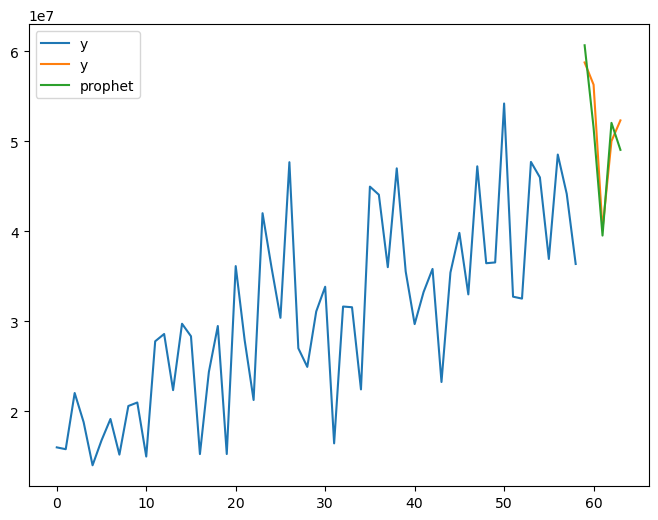

In [52]:
plt.figure(figsize=(8,6))
train_pro['y'].plot(legend=True)
test_pro['y'].plot(legend=True)
pred_prophet.plot(legend=True)

In [53]:
rmse_prophet=np.sqrt(mean_squared_error(test_pro['y'],pred_prophet))
rmse_prophet

2886593.1873036134

### Finding the best performing Model

In [54]:
models={'AutoReg':rmse_auto,'HW_Simp':rmse_hw_simp, 'HW_Exp':rmse_hw_exp, 'TBATS':rmse_tbats, 'SARIMA':rmse_sar,
       'FaceBook Prophet':rmse_prophet}
output=pd.DataFrame.from_dict(models, orient='index').rename(columns={0:'RMSE'}).sort_values('RMSE',ascending=True)
output

,RMSE
FaceBook Prophet,2886593
TBATS,6186727
HW_Exp,7254638
AutoReg,9824856
HW_Simp,12179205
SARIMA,13714482


The FaceBook Prophet model is the overall best-performing model. For communication and illustration purposes, I will get the mean absolute error (MAE) for the FaceBook Prophet model, making it easier to understand how well it performs.

In [60]:
from sklearn.metrics import mean_absolute_error
mae_prophet=mean_absolute_error(test_pro['y'], pred_prophet)
print('The mean absolut error of the model is: {}'.format(round(mae_prophet),2))
print('On average, the model is {} % off'.format(round(mae_prophet/df['Revenue'].mean()*100),2))

The mean absolut error of the model is: 2533394
On average, the model is 8 % off


## Creating the Final Model

In [57]:
final_prophet=Prophet(growth='linear',
              yearly_seasonality=False,
              weekly_seasonality=True,
              daily_seasonality=False,
              seasonality_mode='additive',
             seasonality_prior_scale=5.005,
             changepoint_prior_scale=0.5)
final_prophet.add_regressor('Sales_quantity')
final_prophet.add_regressor('Average_cost')
final_prophet.add_regressor('The_average_annual_payroll_of_the_region')
final_prophet.fit(df_p)

10:44:33 - cmdstanpy - INFO - Chain [1] start processing
10:44:34 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
list(df.iloc[:,1:].reset_index().columns)

['index',
 'Sales_quantity',
 'Average_cost',
 'The_average_annual_payroll_of_the_region']

In [59]:
import joblib
joblib.dump(final_prophet,'Final_Forecasting_Model.pkl')

joblib.dump(list(df.iloc[:,1:].reset_index().columns),'Column_Names_Final_Forecasting_Model.pkl')

['Column_Names_Final_Forecasting_Model.pkl']

# Conclusion

In this project, I attempted to predict the company's revenue based on the different months, which included seasonal trends. Throughout the project, I discovered that the Facebook Prophet model is the best-suited model for the data set.